# Full Problem

This notebook compares results from random search and Bayesian search for a 6D problem on the first patient.

## Clinical Goals (Approved Plan)

idx | Name | Description | Type | GoalCriteria | AcceptanceLevel | ParameterValue
-|-|-|-|-|-|-
19 | PTV | At least 95 % volume at 4800 cGy dose | VolumeAtDose | AtLeast | 0.95 | 4800
20 | PTV | At least 99 % volume at 4320 cGy dose | VolumeAtDose | AtLeast | 0.99 | 4320
11 | SpinalCanal |  At most 2080 cGy dose at 0.35 cm$^3$ volume | DoseAtAbsoluteVolume| AtMost | 2080 | 0.35
9 | Lungs | At most 10 % volume at 2000 cGy dose | VolumeAtDose | AtMost | 0.1 | 2000
3 | Heart | At most 15 cm$^3$ volume at 2800 cGy dose | AbsoluteVolumeAtDose | AtMost | 15 | 2800
18 | Chestwall_L | At most 30 cm$^3$ volume at 3000 cGy dose | AbsoluteVolumeAtDose | AtMost | 30 | 3000
14 | Rib | At most 1 cm$^3$ volume at 3200 cGy dose | AbsoluteVolumeAtDose | AtMost | 1 | 3200

## Clinical Goals (Implemented)

idx | Roi | Type | Goal Criteria | AcceptanceLevel | Parameter Value
-|-|-|-|-|-|
0 | PTV | MinDvh | AtLeast | 4800 | 95
1 | PTV | MaxDose | AtMost | 6240 | 0
2 | SpinalCanal | MaxDvh | AtMost | 2080 | 0.67
3 | Lungs | MaxDvh | AtMost | 2000 | 10
4 | Heart | MaxDvh | AtMost | 2800 |  1.84
5 | ChestWall_L | MaxDvh | AtMost | 3000 | 2.04
6 | Rib | MaxDvh | AtMost | 3200 | 0.27

## Objective Terms

idx | Name | Description | FunctionType | DoseValue | PercentVolume | Weight
-|-|-|-|-|-|-
0 | PTV | Min DVH 4800 cGy to 95% volume | MinDvh | 4800 | 95 | 1
1 | PTV | Max Dose 6240 cGy | MaxDose | 6240 | 0 | 1
2 | SpinalCanal | Max DVH 2080 cGy to 0.67% volume | MaxDvh | 2080 | 0.67 | 1
3 | Lungs | Max DVH 2000 cGy to 10% volume | MaxDvh | 2000 | 10 | 1
4 | Heart | Max DVH 2800 cGy to 2% volume | MaxDvh | 2800 | 1.84 | 1
5 | Chestwall_L | Max DVH 3000 cGy to 2.04% volume | MaxDvh | 3000 | 2.04 | 1
6 | Rib | Max DVH 3200 cGy to 0.27% volume | MaxDvh | 3200 | 0.27 | 1

In [2]:
from importlib import reload
import sys

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.ensemble as ens
import sklearn.gaussian_process as gp

colors = sns.color_palette()

sys.path.append('../../src')
import plots

In [5]:
def normalize_plans(results):
    # Print success
    flag_0 = len(results[results['Flag'] == 0])
    flag_1 = len(results[results['Flag'] == 1])
    flag_2 = len(results[results['Flag'] == 2])
    print(f'Success: {flag_0}, Not Normalized: {flag_1}, Fail: {flag_2}')
    
    # Normalize plans
    if flag_1 > 0:
        for _, row in results.iterrows():
            scale = 4800/row[0]
            for ii in range(7):
                row[ii] *= scale

In [6]:
def plan_score(funcs, pars, goals, results):
    func_vals = 0
    x_grid, _ = plots.format_data(funcs, pars, 'pars')
    x_grid = x_grid[0].values
    ydata, _ = plots.format_data(goals[1:], results, 'goals')
    for ii in range(len(ydata)):
        level = goals.iloc[ii+1]['AcceptanceLevel']
        func_vals += (ydata[ii] - level)/level
    return 100*func_vals/(len(goals) - 1)

In [7]:
# Problem
funcs_full = pd.read_csv('full/funcs.csv')
goals = pd.read_csv('goals.csv')

# Approved plan
results_approved = pd.read_pickle('approved/results.npy')
dvh_approved = np.load('approved/dvh.npy', allow_pickle=True).item()

# Random samples
pars_sample = pd.read_pickle('full/sample/pars.npy')
results_sample = pd.read_pickle('full/sample/results.npy')
normalize_plans(results_sample)
fun_sample = plan_score(funcs_full, pars_sample, goals, results_sample)
            
# # Random search
# results_rand = pd.read_pickle('full/rand/results.npy')
# x_rand = np.load('toy/rand/x_iters.npy').squeeze()
# fun_rand = np.load('toy/rand/func_vals.npy')
# dvh_rand = np.load('toy/rand/dvh.npy', allow_pickle=True).item()

# Bayesian search
#results_bayes = pd.read_pickle('full/bayes/results.npy')
x_bayes = np.load('full/bayes/x_iters.npy').squeeze()
fun_bayes = np.load('full/bayes/func_vals.npy')
#dvh_bayes = np.load('full/bayes/dvh.npy', allow_pickle=True).item()

Success: 100, Not Normalized: 1, Fail: 0


(-3.0, -2.0)

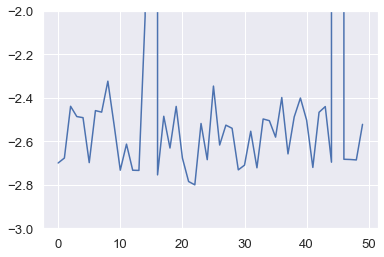

In [13]:
plt.plot(fun_bayes)
plt.ylim([-3, -2])

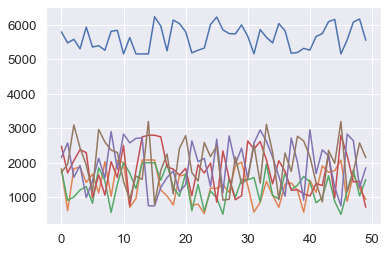

In [16]:
for ii in range(6):
    plt.plot([x_bayes[jj][ii] for jj in range(50)])

In [17]:
# re-run everything with just half range???
# or re-run, but with normalization???